# Decision-Tree for Classification

## Wiscosin Breast Cancer

In [1]:
import pandas as pd
wbc = pd.read_csv('wbc.zip')
wbc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Breast Cancer Dataset in 2D

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

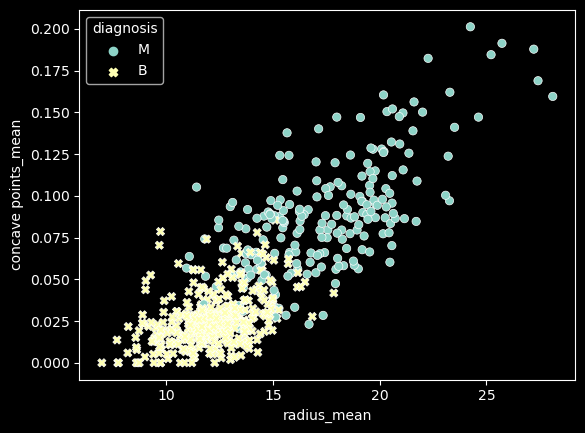

In [3]:
sns.scatterplot(wbc, x='radius_mean', y='concave points_mean', hue='diagnosis', style='diagnosis')
plt.show()

## Classification-tree in scikit-learn

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [5]:
# Split the dataset into 80% train, 20% test
X = wbc[['radius_mean', 'concave points_mean']]
y = pd.Categorical(wbc['diagnosis']).codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [6]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [7]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

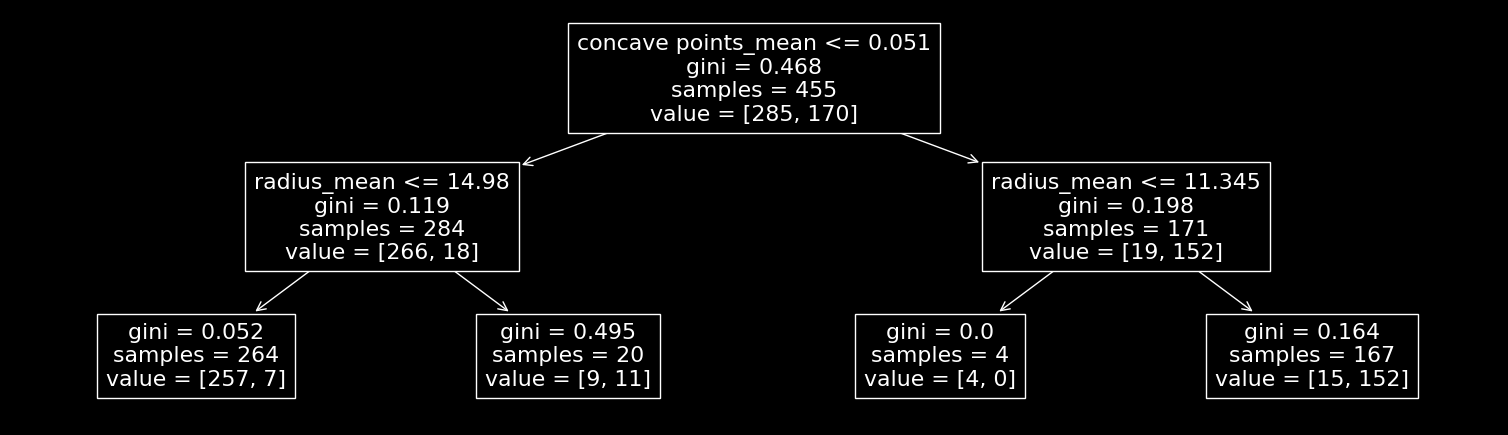

In [8]:
plt.figure(figsize=(19.2, 10.8/2))
plot_tree(dt, feature_names=X.columns.tolist())
plt.show()

In [9]:
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.9035087719298246

## Logistic regression vs classification tree

In [10]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# Instatiate logreg
logreg = LogisticRegression()
# Fit logreg to the training set
logreg.fit(X_train, y_train)
# Predict the test set labels
y_pred = logreg.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.8859649122807017

## Information Gain (IG)

$$IG(feature, split\_point) = I(parent) - \left( \frac{N_{left}}{N} I(left) + \frac{N_{right}}{N} I(right) \right)$$

Criteria to measure the impurity of a node I(node):
* gini index,
* entropy. ...

## Information Criterion in scikit-learn

In [11]:
# using all 30 features
X = wbc.iloc[:, 2:-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
# Instantiate dt, set 'criterion' to 'gini'
dt_gini = DecisionTreeClassifier(max_depth=8,criterion='gini', random_state=1)
# Fit dt to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

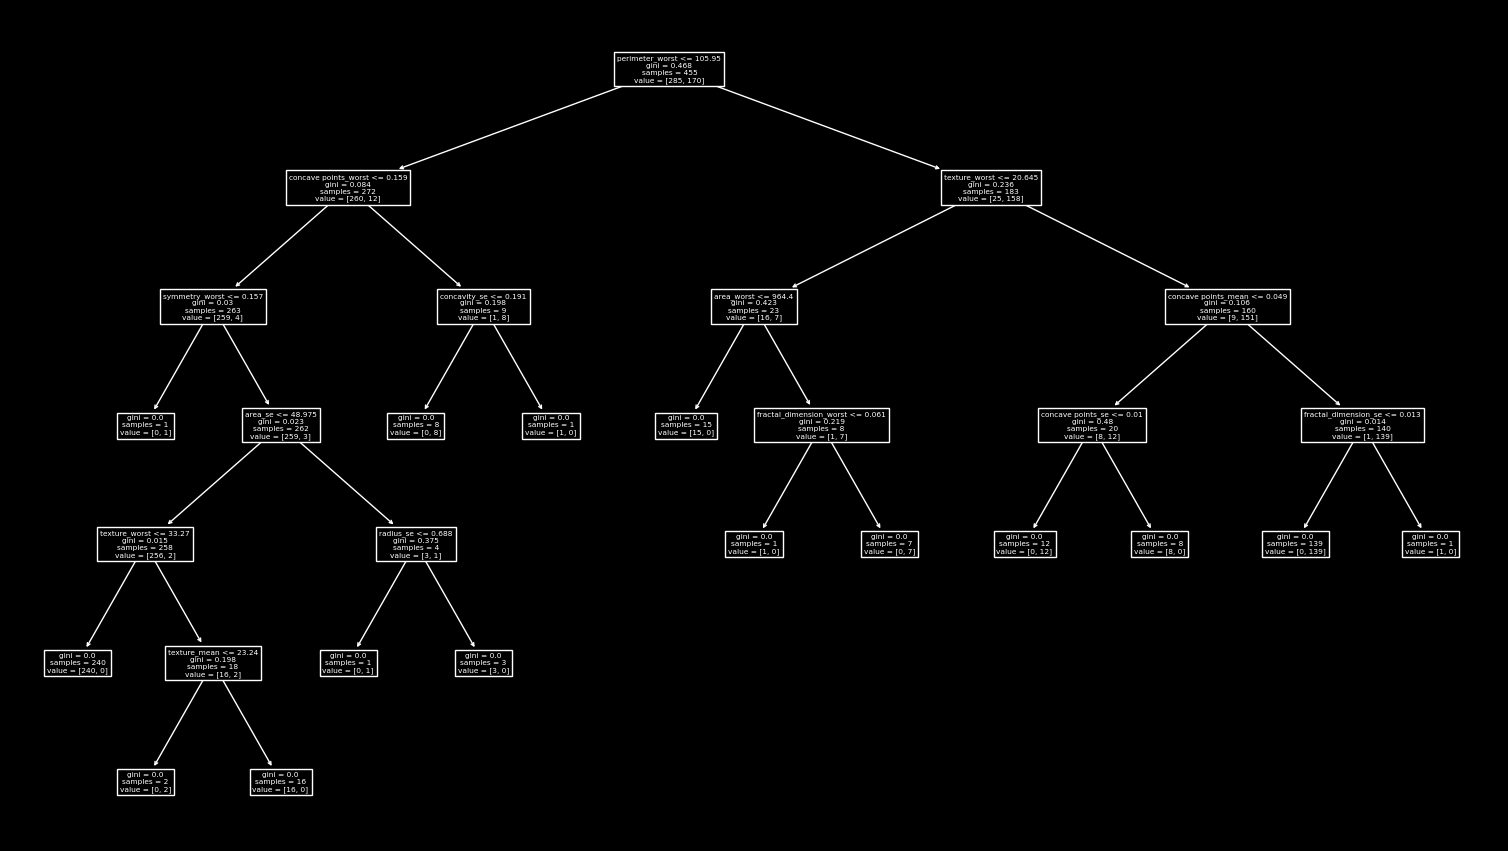

In [13]:
plt.figure(figsize=(19.2, 10.8)); plot_tree(dt_gini, feature_names=X.columns.tolist()); plt.show()

In [14]:
# Predict test-set labels
y_pred = dt_gini.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.9298245614035088

## Using entropy as a criterion

In [15]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

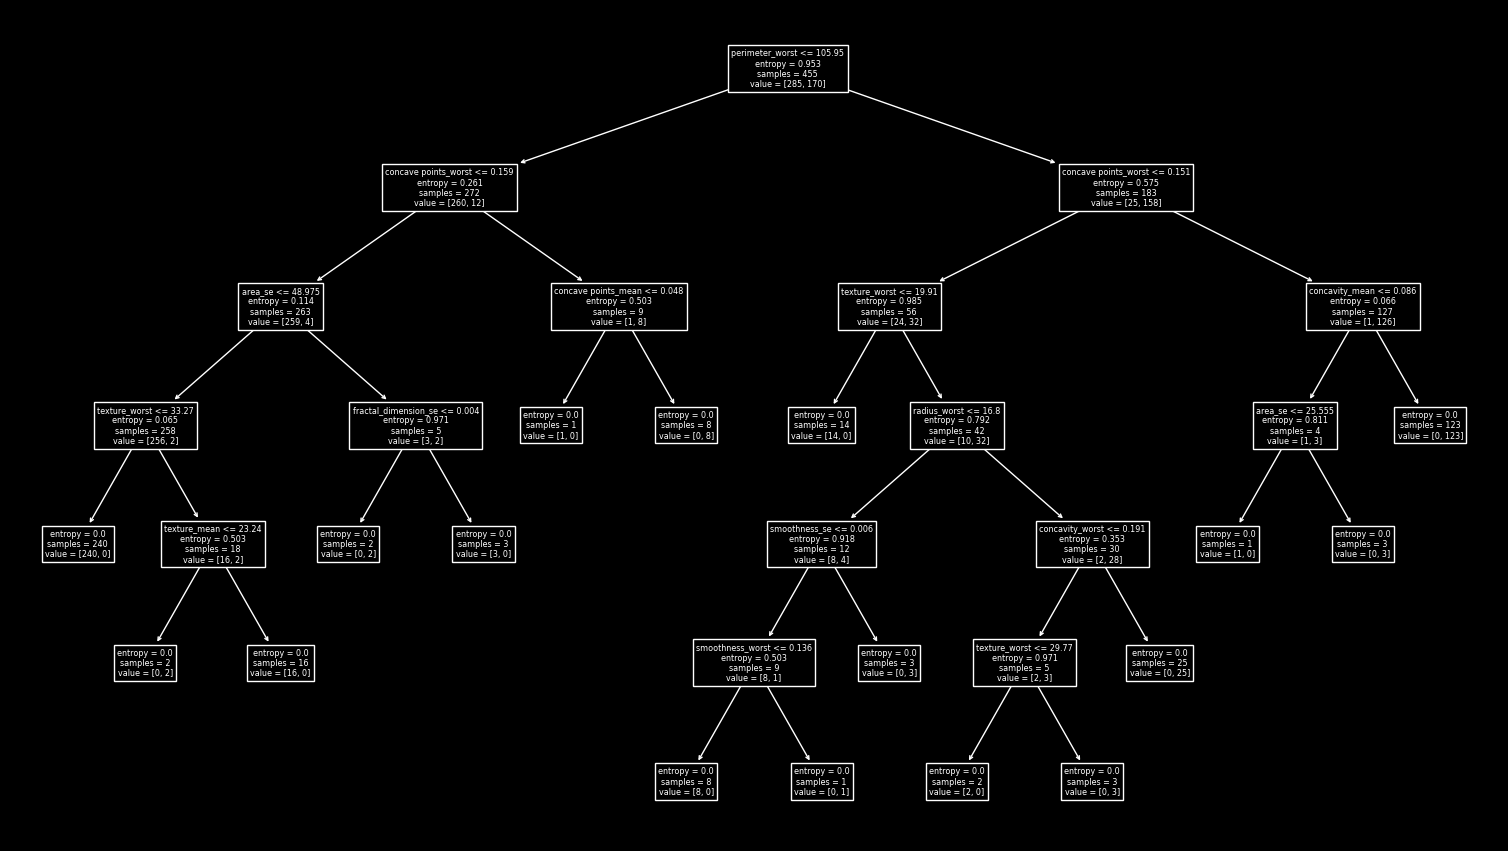

In [16]:
plt.figure(figsize=(19.2, 10.8)); plot_tree(dt_entropy, feature_names=X.columns.tolist()); plt.show()

In [17]:
# Predict test-set labels
y_pred = dt_entropy.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.9298245614035088

> Most of the time, the gini index and entropy lead to the same results.   
The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

# Decision-Tree for Regression

## Auto-mpg Dataset

In [18]:
auto = pd.read_csv('auto.zip')
auto

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0
...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,US,15.0
388,27.0,151.0,90,2950,17.3,US,10.0
389,29.5,98.0,68,2135,16.6,Asia,10.0
390,17.5,250.0,110,3520,16.4,US,15.0


## Auto-mpg with one features

/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


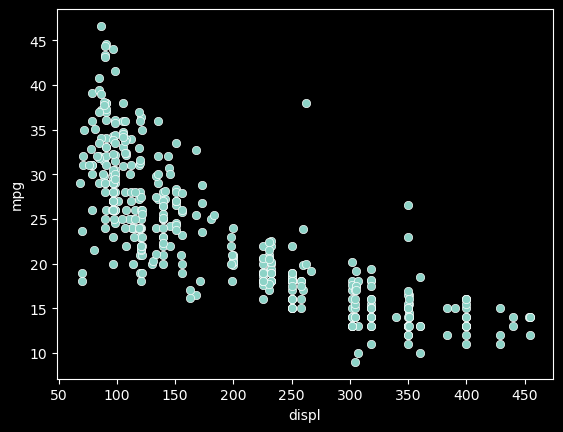

In [19]:
sns.scatterplot(auto, x='displ', y='mpg')
plt.show()

## Regression-Tree in scikit-learn

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

In [21]:
X = auto.iloc[:, 1:]
X['origin'] = pd.Categorical(X['origin']).codes
y = auto['mpg']

> You can now instantiate the DecisionTreeRegressor() with a maximum depth of 4 by setting the parameter max_depth to 4. In addition, set the parameter min_sample_leaf to 0-dot-1 to impose a stopping condition in which each leaf has to contain at least 10% of the training data.

`min_samples_leaf`  
The minimum number of samples required to be at a leaf node.  
A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.  
This may have the effect of smoothing the model, especially in regression.

In [22]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [23]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

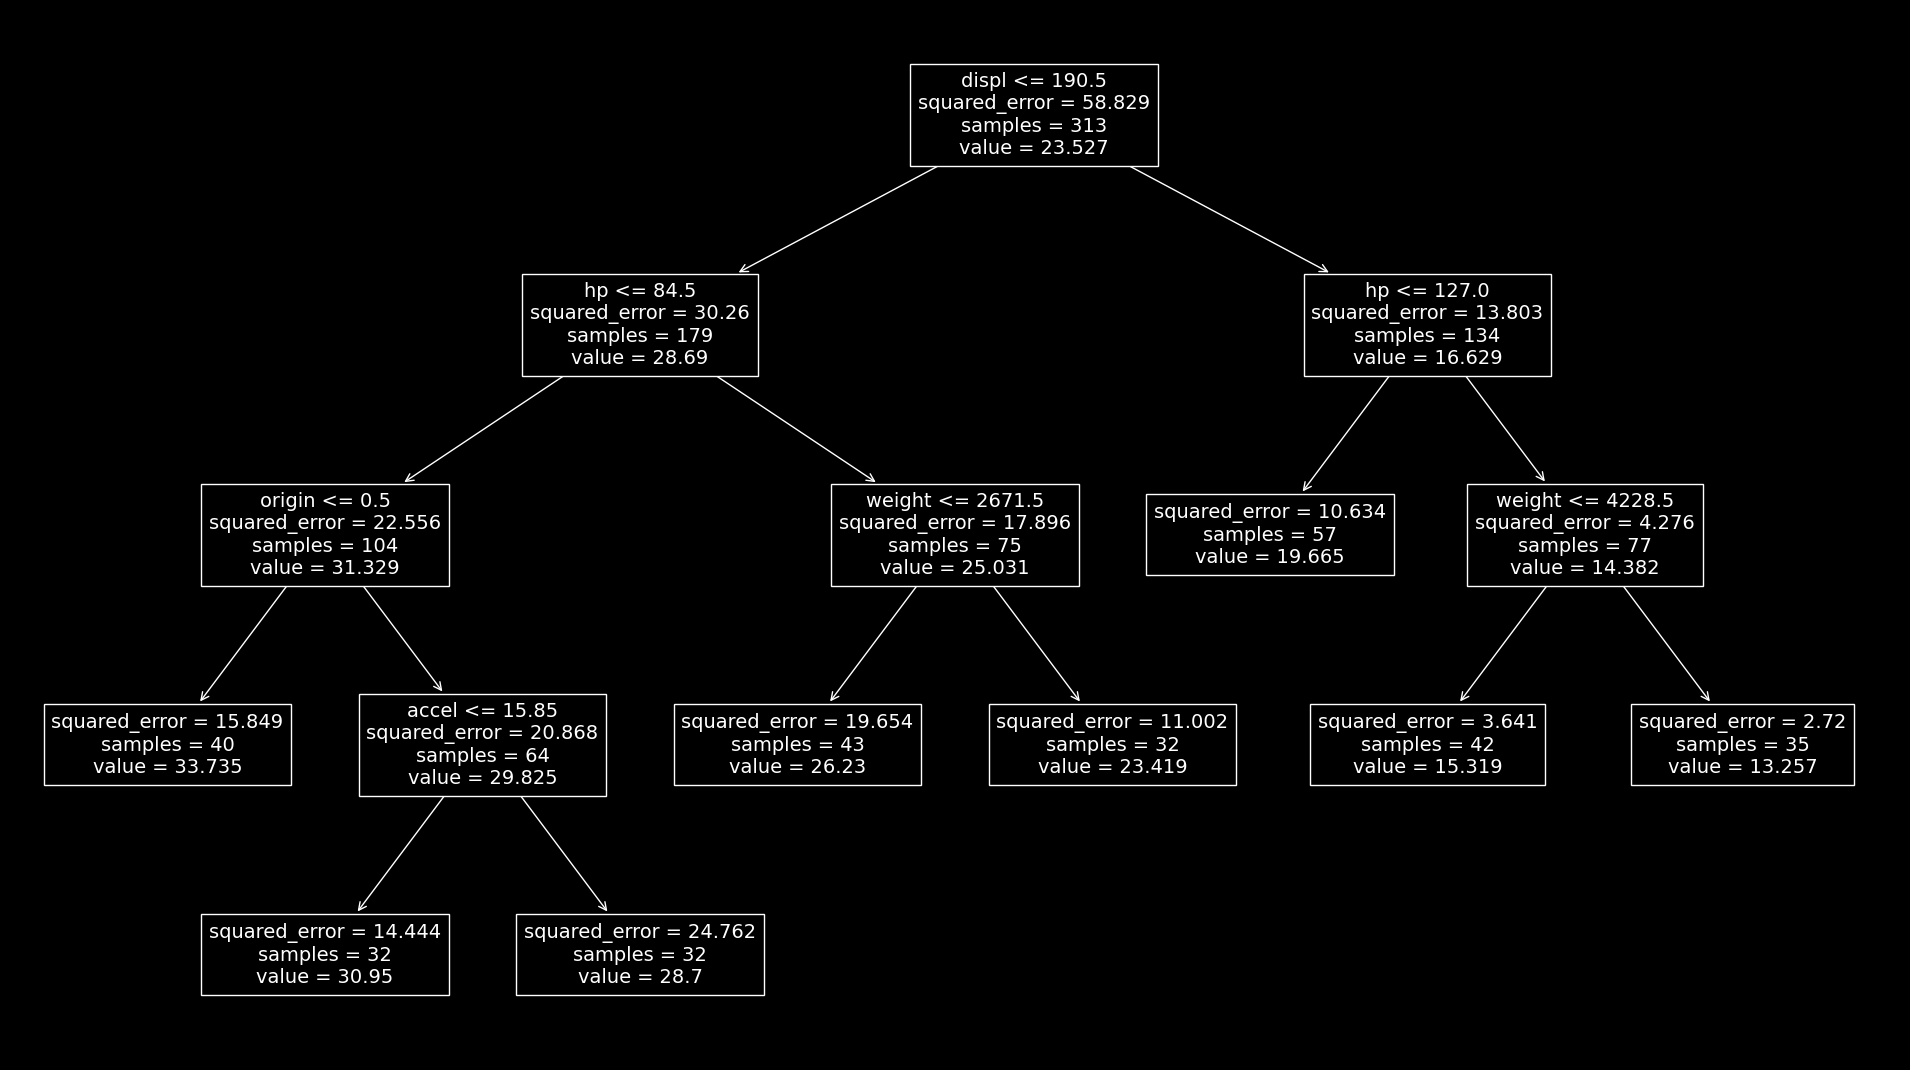

In [24]:
plt.figure(figsize=(19.2, 10.8)); plot_tree(dt, feature_names=X.columns.tolist()); plt.tight_layout(); plt.show()

In [25]:
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set RMSE
MSE(y_test, y_pred) ** (1/2)

4.697042846107747

## Information Gain (IG)

$$IG(feature, split\_point) = I(parent) - \left( \frac{N_{left}}{N} I(left) + \frac{N_{right}}{N} I(right) \right)$$

## Information Criterion for Regression-Tree

Here, it's important to note that, when a regression tree is trained on a dataset, the impurity of a node is measured using the mean-squared error of the targets in that node. This means that the regression tree tries to find the splits that produce leafs where in each leaf the target values are on average, the closest possible to the mean-value of the labels in that particular leaf. 

MSE: Mean Squared Error

$$I(node) = MSE(node) =  \frac{1}{N_{node}} \sum \left(y^{(i)} - \hat{y}_{node} \right)^2$$

Mean target value:

$$\hat{y}_{node} = \frac{1}{N_{node}} \sum_{i\in node} y^{(i)}$$

## Prediction

As a new instance traverses the tree and reaches a certain leaf, its target-variable 'y' is computed as the average of the target-variables contained in that leaf as shown in this formula. 

$$ \hat{y}_{pred}(leaf) = \frac{1}{N_{leaf}} \sum_{i\in leaf} y^{(i)}$$

## Train your first regression tree

In [28]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

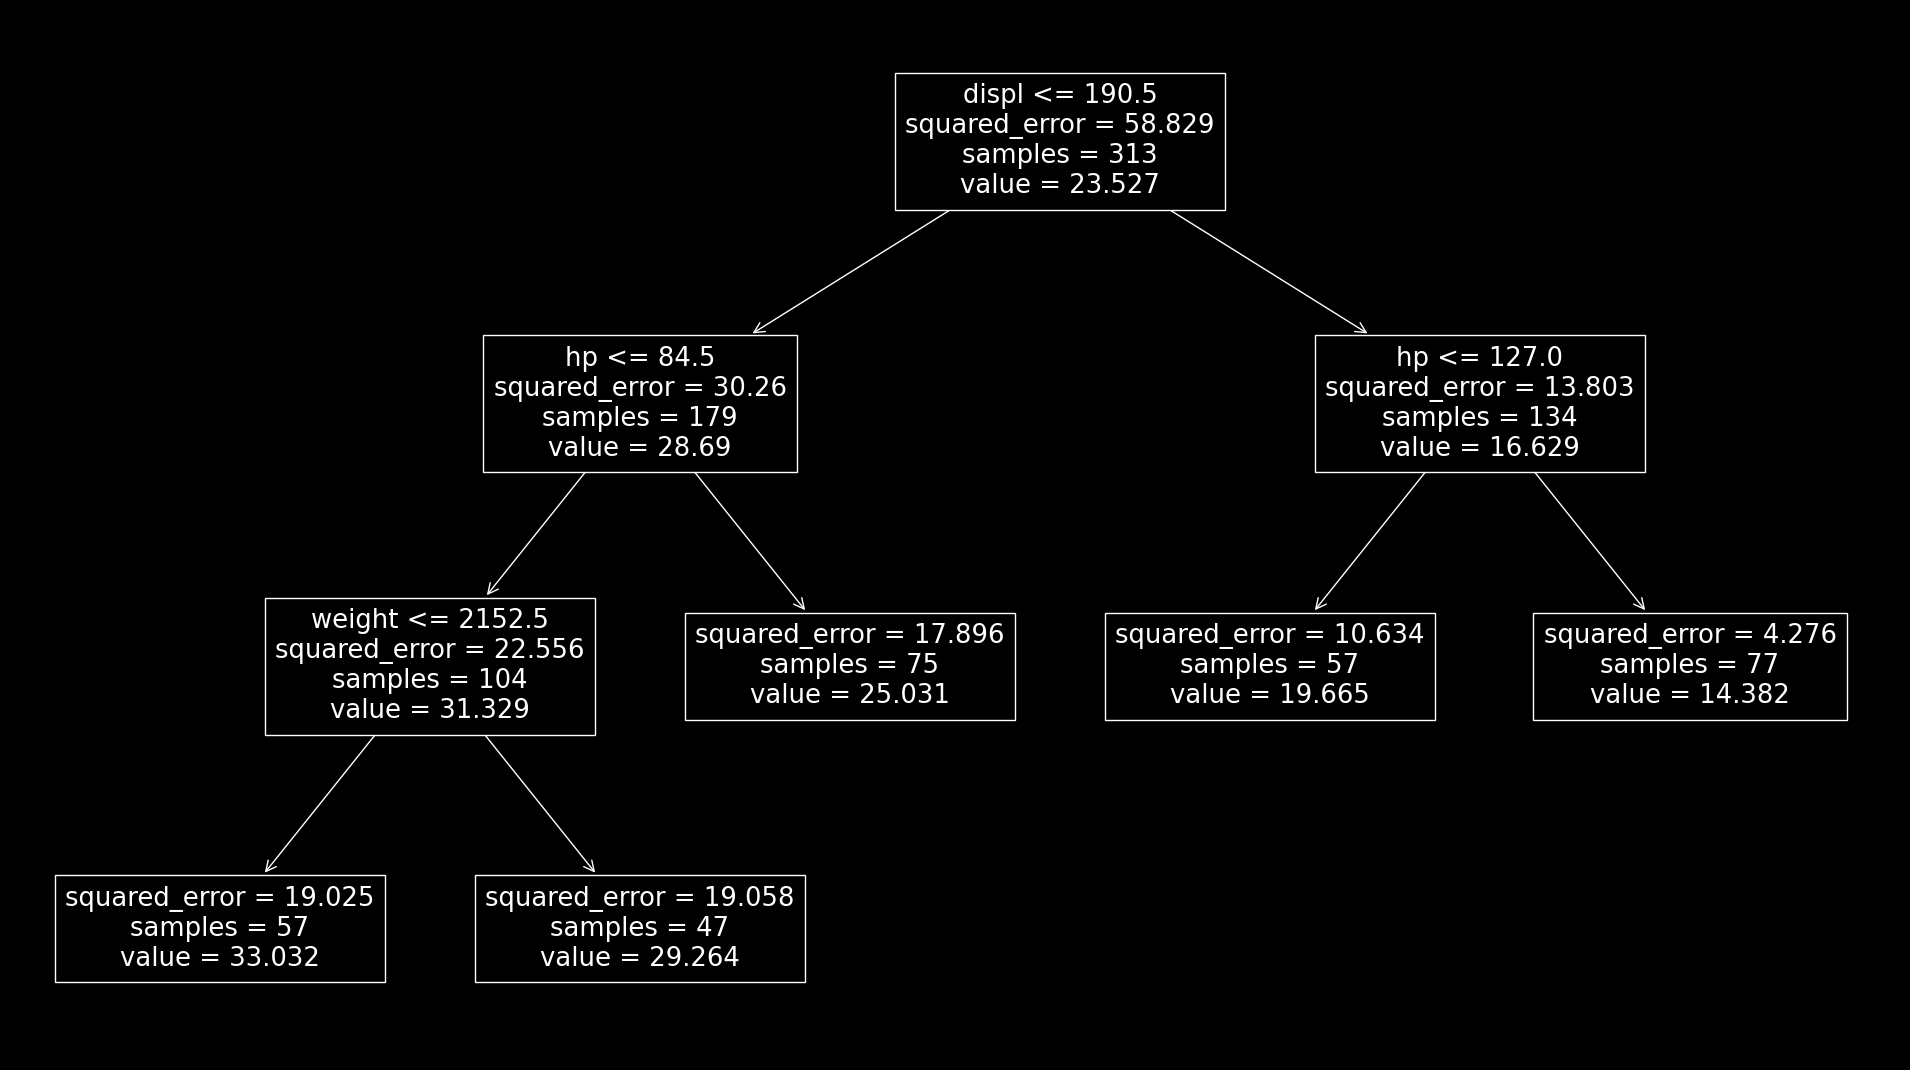

In [30]:
plt.figure(figsize=(19.2, 10.8)); plot_tree(dt, feature_names=X.columns.tolist()); plt.tight_layout(); plt.show()

In [31]:
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set RMSE
MSE(y_test, y_pred) ** (1/2)

4.366505690565745

## Linear regression vs regression tree

In [ ]:
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
MSE(y_test, y_pred) ** (1/2)